In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Dataset/marketing_campaign_data.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

# Conversion Rate Analysis Based on Income, Spending and Age
Analisis conversion rate merupakan suatu pencarian insight data persentase pengunjung website serta tindakann apa saja yang mereka lakukan selama mengunjungi situs, dan apakah tindakan mereka menghasilkan transaksi pembelian atau tidak selama berkunjung di website tersebut, hal in dapat dilakukan dengan melakukan feature engineering pada variable data yang tersaji, sehingga dapat menghasilkan satu kolom baru yaitu Conversion rate.

Setelah Conversion rate terbentuk, maka dapat dianalisis dengan variable lain seperti umur, penghasilan, pengeluaran, dll. sehingga dapat menemukan suatu pola perilaku konsumen.

In [50]:
#umur
df['Age'] = 2022 - df['Year_Birth']
#group umur
def umur(x):
  if x['Age'] < 6:
    group = 'babies'
  elif x['Age'] < 17:
    group = 'teen'
  elif x['Age'] < 31:
    group = 'young adult'
  else:
    group = 'adult'
  return group

df['GroupAge'] = df.apply(lambda x: umur(x), axis=1)
#total anak orang tua atau bukan
df['child'] = df['Kidhome'] + df['Teenhome']

def parent(x):
  if x['Marital_Status'] == 'Menikah':
    if x['child'] > 0:
      status = 'Yes'
    else:
      status = 'No'
  else:
    status = 'Single'
  return status

df['is_parent'] = df.apply(lambda x: parent(x), axis=1)
#jumlah pengeluaran
df['total_spent'] = df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits'] + df['MntSweetProducts'] + df['MntCoke'] + df['MntGoldProds']
#total accept camp
df['accepted_campaign'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] +df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
#total jumlah transaksi
df['total_purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
#conversion rate -> jumlah respons/total visits
df['conversion_rate'] = df.apply(lambda x: x['total_purchases']/x['NumWebVisitsMonth'] if x['NumWebVisitsMonth'] != 0 else 0, axis=1)

df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'GroupAge', 'child', 'is_parent', 'total_spent',
       'accepted_campaign', 'total_purchases', 'conversion_rate'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

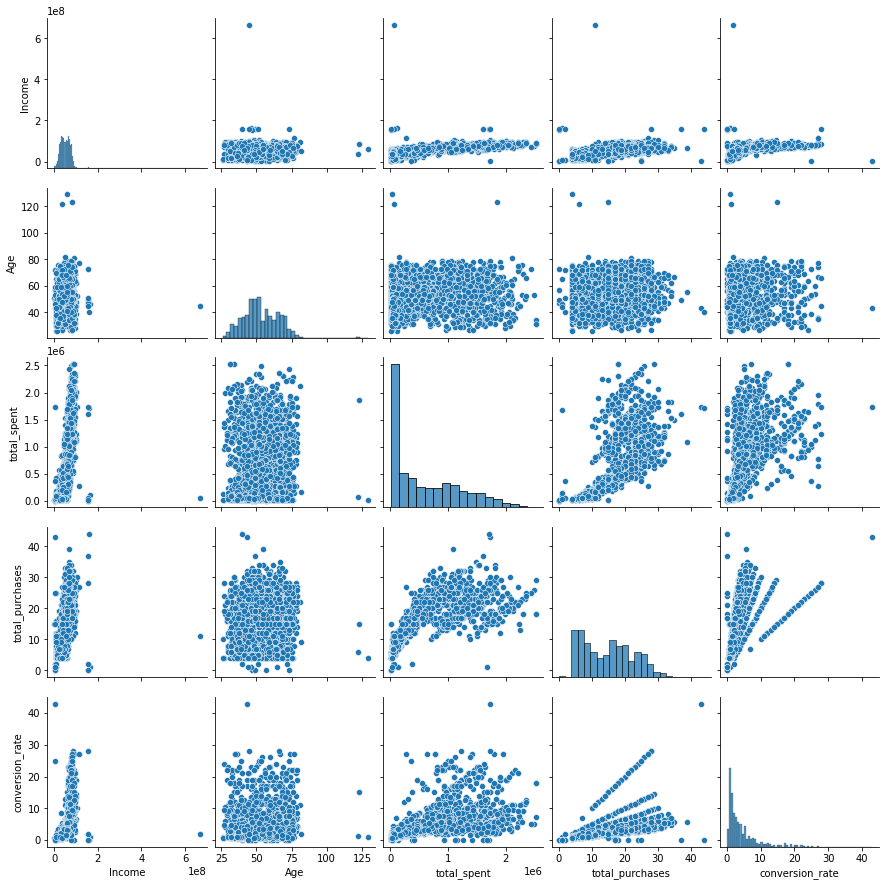

In [51]:
df_pair = df[['Income', 'Age', 'total_spent', 'total_purchases', 'conversion_rate']]
plt.figure(figsize=(10,10))
sns.pairplot(df_pair)

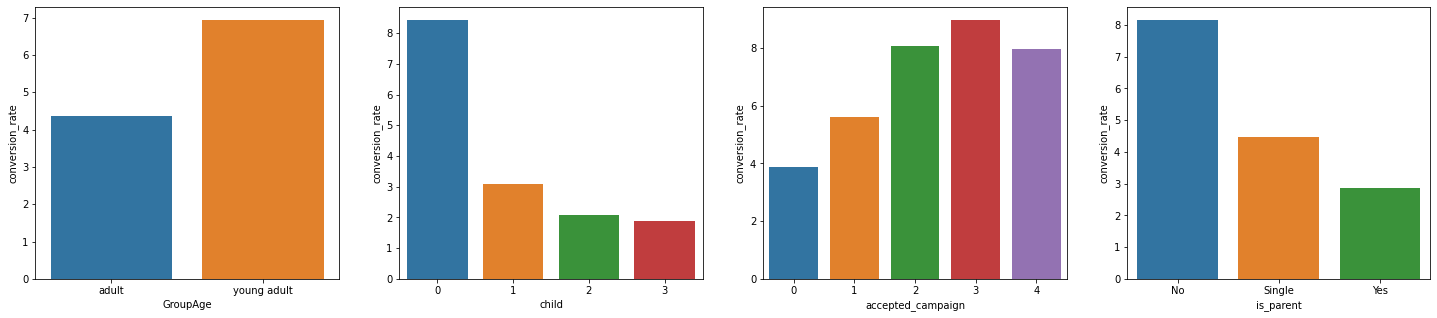

In [52]:
cat = ['GroupAge', 'child', 'accepted_campaign', 'is_parent']

age_mean = df.groupby('GroupAge')['conversion_rate'].mean().reset_index()
child_mean = df.groupby('child')['conversion_rate'].mean().reset_index()
accamp_mean = df.groupby('accepted_campaign')['conversion_rate'].mean().reset_index()
parent_mean = df.groupby('is_parent')['conversion_rate'].mean().reset_index()

fig, ax = plt.subplots(1, 4, figsize=(25,5))
sns.barplot(x='GroupAge', y='conversion_rate', data=age_mean, ax=ax[0])
sns.barplot(x='child', y='conversion_rate', data=child_mean, ax=ax[1])
sns.barplot(x='accepted_campaign', y='conversion_rate', data=accamp_mean, ax=ax[2])
sns.barplot(x='is_parent', y='conversion_rate', data=parent_mean, ax=ax[3])


In [53]:
df = df[df['Income']!=df['Income'].max()]

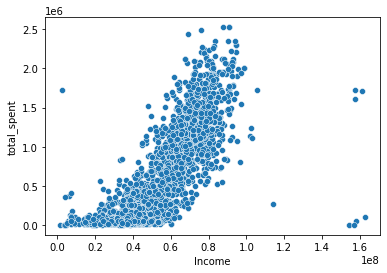

In [54]:
sns.scatterplot(x='Income', y='total_spent', data=df)

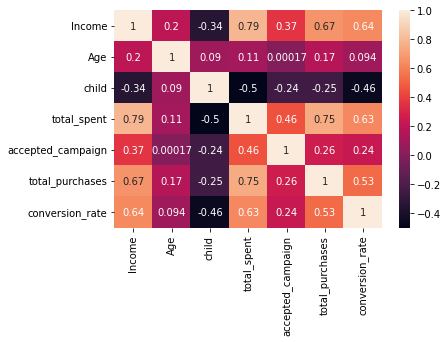

In [55]:
data = df[['Income', 'Age', 'GroupAge', 'child', 'total_spent', 'accepted_campaign', 'total_purchases', 'conversion_rate', 'is_parent']]
sns.heatmap(data.corr(), annot=True)

# Data Cleaning & Preprocessing
Sebelum memulai pemrosesan data, tahap paling awal yang harus dilakukan adalah mempersiapkan data mentah menjadi data yang bersih dan siap diolah. 
1. Mengatasi data null dan duplicated
2. Membuang data yang tidak diperlukan
3. Melakukan feature encoding
4. Melakukan standardisasi pada feature

In [56]:
df.isna().sum()

Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
GroupAge                0
child                   0
is_parent               0
total_spent             0
accepted_campaign       0
total_purchases         0
conversion_rate         0
dtype: int64

In [57]:
df = df.dropna()

In [58]:
df.isna().sum().sum()

0

In [59]:
df.duplicated().sum()

0

### Feature Encoding

In [60]:
def umur_enc(x):
  if x['GroupAge'] == 'babies':
    group = 0
  elif x['GroupAge'] == 'teen':
    group = 1
  elif x['GroupAge'] == 'young adult':
    group = 2
  else:
    group = 3
  return group

df['GroupAge'] = data.apply(lambda x: umur_enc(x), axis=1)
df['is_parent'] = data.apply(lambda x: 1 if x['is_parent'] == 'Yes' else 0, axis=1)

### Handling outliers

In [61]:
from scipy import stats

In [62]:
data = df[['Income', 'Age', 'GroupAge', 'child', 'total_spent', 'accepted_campaign', 'total_purchases', 'conversion_rate', 'is_parent']]

In [63]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([True] * len(data))

for col in data.columns:
    zscore = abs(stats.zscore(data[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
data = data[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 2215
Jumlah baris setelah memfilter outlier: 2068


In [64]:
data

,Income,Age,GroupAge,child,total_spent,accepted_campaign,total_purchases,conversion_rate,is_parent
0,58138000.0,65,3,0,1617000,0,25,3.571429,0
1,46344000.0,68,3,2,27000,0,6,1.200000,0
2,71613000.0,57,3,0,776000,0,21,5.250000,0
3,26646000.0,38,3,1,53000,0,8,1.333333,0
4,58293000.0,41,3,1,422000,0,19,3.800000,1
...,...,...,...,...,...,...,...,...,...
2235,61223000.0,55,3,1,1341000,0,18,3.600000,1
2236,64014000.0,76,3,3,444000,1,22,3.142857,0
2237,56981000.0,41,3,0,1241000,1,19,3.166667,0
2238,69245000.0,66,3,1,843000,0,23,7.666667,0


# Data Modeling
Supaya hasil dari model valid dan robust, kita harus mempunyai data yang bersih dan siap untuk diolah dengan menggunakan algoritma yang akan kita gunakan. Oleh karena itu, data yang sudah di-cleaning pada tahap sebelumnya akan digunakan untuk pemodelan data dengan melakukan task clustering. Pada tahap ini, kamu diminta untuk menerapkan algoritma k-means clustering pada dataset yang ada, pilihlah jumlah cluster yang tepat dengan melihat dari elbow method, dan lakukan evaluasi dengan menggunakan silhouette score. 
1. Melihat jumlah cluster yang tepat dengan menggunakan elbow method
2. Melakukan implementasi clustering dengan menggunakan k-means clustering
3. Menghitung sillhouette score melihat bagaimana performa model yang didapat



In [65]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [66]:
df_clust = data[['total_spent', 'Income', 'conversion_rate']]

In [67]:
sc_data = StandardScaler()
df_std = sc_data.fit_transform(df_clust.astype(float))

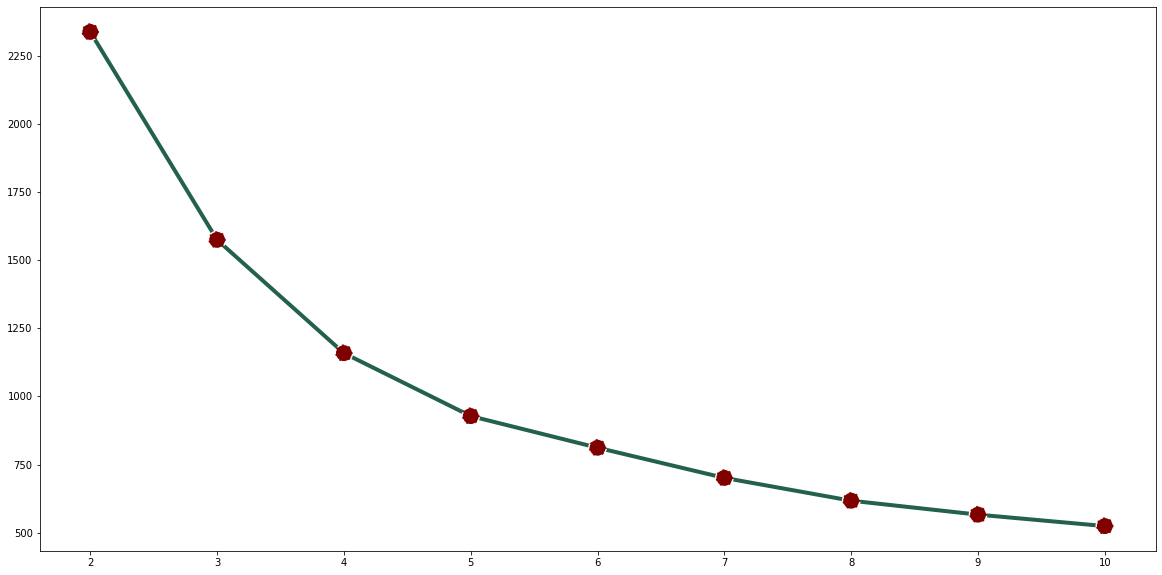

In [68]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='#23614c', linewidth = 4, zorder=-10)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')

In [69]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2, 9):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_std)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_std, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.5553597812501511)
For n_clusters = 3, silhouette score is 0.5043305700155443)
For n_clusters = 4, silhouette score is 0.4319634422899811)
For n_clusters = 5, silhouette score is 0.3901059644133214)
For n_clusters = 6, silhouette score is 0.35405412015906923)
For n_clusters = 7, silhouette score is 0.37015953087846076)
For n_clusters = 8, silhouette score is 0.3515998871490368)


In [70]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_std)

In [71]:
df_data_std = pd.DataFrame(data=df_std, columns=list(df_clust))

In [72]:
df_data_std['clusters'] = kmeans.labels_
df_clust['clusters'] = kmeans.labels_
data['clusters'] = kmeans.labels_

In [73]:
data.head()

,Income,Age,GroupAge,child,total_spent,accepted_campaign,total_purchases,conversion_rate,is_parent,clusters
0,58138000.0,65,3,0,1617000,0,25,3.571429,0,1
1,46344000.0,68,3,2,27000,0,6,1.200000,0,0
2,71613000.0,57,3,0,776000,0,21,5.250000,0,1
3,26646000.0,38,3,1,53000,0,8,1.333333,0,0
4,58293000.0,41,3,1,422000,0,19,3.800000,1,3


<Figure size 720x720 with 0 Axes>

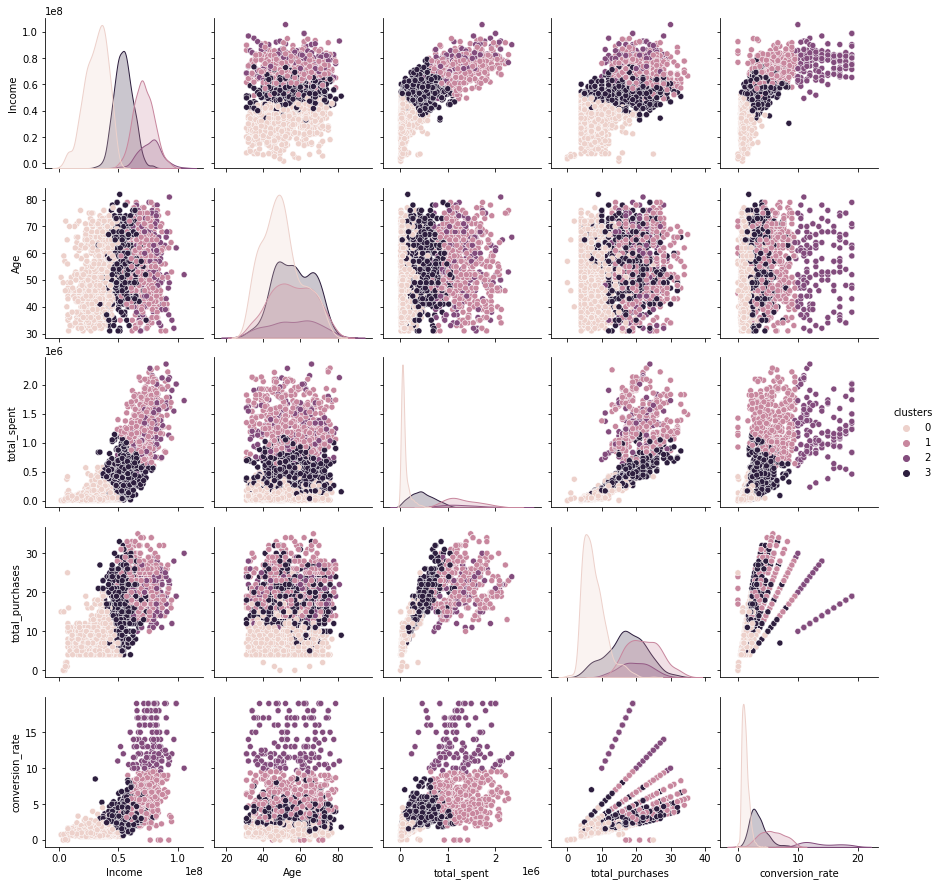

In [74]:
df_edac = data[['Income', 'Age', 'total_spent', 'total_purchases', 'conversion_rate', 'clusters']]
plt.figure(figsize=(10,10))
sns.pairplot(df_edac, hue='clusters')

# Customer Personality Analysis for Marketing Retargeting
Hasil dari clustering yang telah dilakukan sebelumnya dapat di interpretasikan berdasarkan pada karateristik per kelompoknya, bagaimana kecenderungan cluster untuk merespon marketing campaign yang ada, dan bagaimana hasil potensial revenue jika kita melakukan marketing retargetting kepada cluster tersebut 
1. Melakukan interpretasi terhadap hasil cluster yang ada dari masing-masing feature yang digunakan
2. Memilih cluster yang akan dilakukan marketing retargetting
3. Menghitung potential impact dari hasil marketing retargetting dari cluster yang ada



In [75]:
clust_map = {0:'Low Potential', 1:'Potential', 2:'High Potential', 3:'Medium Low Potential'}

df_clust['cluster_map'] = df_clust['clusters'].map(clust_map)

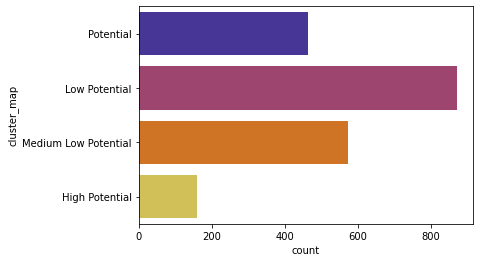

In [85]:
sns.countplot(y=df_clust['cluster_map'], palette='CMRmap')

In [77]:
display(df_clust.groupby('clusters').agg(['mean','median']))

total_spent                   Income             conversion_rate  \
                  mean     median          mean      median            mean   
clusters                                                                      
0         8.806422e+04    57000.0  3.112632e+07  32145000.0        1.191172   
1         1.306481e+06  1244000.0  7.120765e+07  70784500.0        5.672025   
2         1.260161e+06  1198000.0  7.668677e+07  77457000.0       13.740166   
3         4.679023e+05   443000.0  5.422843e+07  54165000.0        3.345089   

                     
             median  
clusters             
0          1.111111  
1          5.500000  
2         13.000000  
3          3.000000

In [78]:
clust = df_clust.groupby('clusters').agg(['mean','median']).reset_index()
clust.columns = ['clusters', 'total_spent_mean', 'total_spent_median', 'Income_mean', 'Income_median', 'conversion_rate_mean', 'conversion_rate_median']
clust

,clusters,total_spent_mean,total_spent_median,Income_mean,Income_median,conversion_rate_mean,conversion_rate_median
0,0,8.806422e+04,57000.0,3.112632e+07,32145000.0,1.191172,1.111111
1,1,1.306481e+06,1244000.0,7.120765e+07,70784500.0,5.672025,5.500000
2,2,1.260161e+06,1198000.0,7.668677e+07,77457000.0,13.740166,13.000000
3,3,4.679023e+05,443000.0,5.422843e+07,54165000.0,3.345089,3.000000


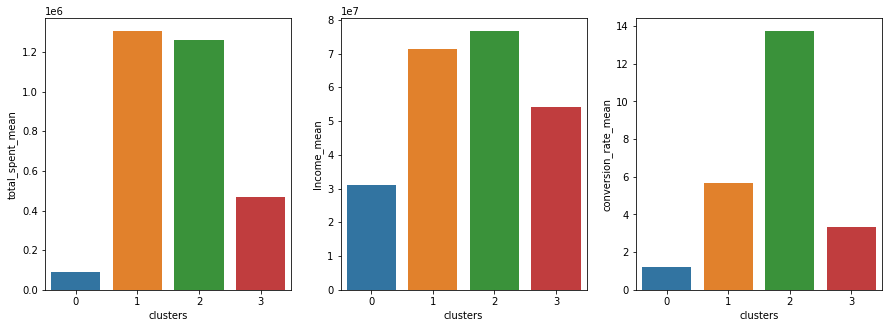

In [79]:
mean = ['total_spent_mean', 'Income_mean', 'conversion_rate_mean']

plt.figure(figsize=(15,5))
for i in range(len(mean)):
    plt.subplot(1,3,i+1)
    sns.barplot(x='clusters', y=mean[i], data=clust)
